### Event History Analysis - Introduction
This program analyses the event history table of a parkrun event as it appears on the parkrun website, outputting a  plot of finisher and volunteer numbers by event number. 

**Pandas** is used for data processing, **Matplotlib** for the graphical outputs. The input dataset is in a cleaned .csv format.

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#### Load dataset and display as dataframe
Dataset is read from a .csv file and then converted to a Dataframe (df). The format of the filename must be 
**'[event_name]_history.csv'** (with event names of more than 1 word  seperated by"_")
so that event name can be extracted and used later in plot or table text.

Example format of data in .csv file:
```
EVENT,DATE,FINISHERS,VOLUNTEERS,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME
321,27/05/2023,413,28,male ANON,00:16:33,female ANON,00:18:54
320,20/05/2023,509,31,male ANON,00:15:27,female ANON,00:17:22
319,13/05/2023,422,34,male ANON,00:15:44,female ANON,00:18:30
318,6/5/2023,468,33,male ANON,00:17:01,female ANON,00:18:43
317,29/04/2023,436,28,male ANON,00:16:07,female ANON,00:19:12
```

In [2]:
#read in csv file to dataframe
filename ="Example_Event_History.csv"
df= pd.read_csv(filename)

#test output
df

,EVENT,DATE,FINISHERS,VOLUNTEERS,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME
0,321,27/05/2023,413,28,male ANON,00:16:33,female ANON,00:18:54
1,320,20/05/2023,509,31,male ANON,00:15:27,female ANON,00:17:22
2,319,13/05/2023,422,34,male ANON,00:15:44,female ANON,00:18:30
3,318,6/5/2023,468,33,male ANON,00:17:01,female ANON,00:18:43
4,317,29/04/2023,436,28,male ANON,00:16:07,female ANON,00:19:12
...,...,...,...,...,...,...,...,...
316,5,19/09/2015,263,22,male ANON,00:16:16,female ANON,00:21:41
317,4,12/9/2015,189,25,male ANON,00:17:49,female ANON,00:22:06
318,3,5/9/2015,266,25,male ANON,00:18:03,female ANON,00:21:42
319,2,29/08/2015,227,26,male ANON,00:17:53,female ANON,00:20:08


#### Order Dataframe by event number
Table appears by default on parkrun website with latest event first. Reordering here chronologically is likely to make dataframe visualisation and analyis easier.
```.reset_index(drop=True)``` ensures the dataframe is not just flipped for visulisation, but indexes are reset in the new order.

In [3]:
#Reorder by event number setting event by index
df = df.loc[::-1].reset_index(drop=True)
df

,EVENT,DATE,FINISHERS,VOLUNTEERS,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME
0,1,22/08/2015,234,28,male ANON,00:17:21,female ANON,00:21:10
1,2,29/08/2015,227,26,male ANON,00:17:53,female ANON,00:20:08
2,3,5/9/2015,266,25,male ANON,00:18:03,female ANON,00:21:42
3,4,12/9/2015,189,25,male ANON,00:17:49,female ANON,00:22:06
4,5,19/09/2015,263,22,male ANON,00:16:16,female ANON,00:21:41
...,...,...,...,...,...,...,...,...
316,317,29/04/2023,436,28,male ANON,00:16:07,female ANON,00:19:12
317,318,6/5/2023,468,33,male ANON,00:17:01,female ANON,00:18:43
318,319,13/05/2023,422,34,male ANON,00:15:44,female ANON,00:18:30
319,320,20/05/2023,509,31,male ANON,00:15:27,female ANON,00:17:22


#### Extract Strings For Use On Graphs
Strings for use in graph text are extracted to avoid manual entry.

**Event name** is extracted from the filename (must be in format must be 
**'[event_name]_history.csv'**) by splitting it at underscores then joining the event name parts.

**Dates of first and latest event** strings are taken from first and last items in the 'DATE' column.

In [4]:
#extract variables from filename and dataframe which wil be used in plot text
spl= filename.split("_") #splits filename at each underscore into list of its components
ev_name=' '.join(spl[0:-1]) #joins as string all but the last item in the split filename ("History.csv")

#extract date range variables
latest=df['DATE'].iloc[-1]
inaugural=df['DATE'].iloc[0]
events=len(df)

#test output
print(ev_name)
print( inaugural, latest, events)

Example Event
22/08/2015 27/05/2023 321


#### Keep Only Required Columns
All we need for this analysis are the Finishers and Volunteer numbers columns as well as the event number so the rest of the dataframe can be dropped.

Doing this simply using ```df = df[["EVENT","FINISHERS","VOLUNTEERS"]]```  can raise a **'SettingWithCopyWarning'** later, if
 performing operations on a sliced dataframe so instead, ```.loc[row_indexer,col_indexer]``` is used, which selects all rows of the given columns to replace the existing dataframe.

In [5]:
##select columns to include in analysis. '.loc' prevents inconsistencies later from formatting sliced dataframes
df = df.loc[:,["EVENT","FINISHERS","VOLUNTEERS"]]

#test output
df


,EVENT,FINISHERS,VOLUNTEERS
0,1,234,28
1,2,227,26
2,3,266,25
3,4,189,25
4,5,263,22
...,...,...,...
316,317,436,28
317,318,468,33
318,319,422,34
319,320,509,31


#### Add column for 'rolling average' of number of finishers
Finisher numbers week to week can be highly variable so for easier visualisation a rolling average line plot will be added over the finisher numbers scatter plot. 

This code sets the number of previous events included in the 'roll' to **number of events/50** so that it scales automatically depending in event numbers. The first few values in this column will be ```NaN``` until there are enough previous values to 'roll'.


In [6]:
# #create moving average of finisher numbers

roll= int(len(df)/50)
df['FINISHERS_AVGroll'] = df['FINISHERS'].rolling(roll).mean().shift()

#test output
df

,EVENT,FINISHERS,VOLUNTEERS,FINISHERS_AVGroll
0,1,234,28,NaN
1,2,227,26,NaN
2,3,266,25,NaN
3,4,189,25,NaN
4,5,263,22,NaN
...,...,...,...,...
316,317,436,28,446.833333
317,318,468,33,445.666667
318,319,422,34,453.500000
319,320,509,31,455.833333


#### Finishers and Volunteers v Event number
 
A titled figure is created, specifying number of rows and columns of axes. This makes multiple axes layout easy to arrange though only 1 is needed in this case. x axis data is specified as the event number and multiple y axis data (scatter of finishers and volunteer numbers as well as line of finishers rolling average) are plotted.

**f-strings** are used to place event name and date ranges in the titles and subtitle.

 **x and y lower limits** are set to zero so that origin is neatly  (0,0).

 **Gridlines** are then added for easier reading of the data points.


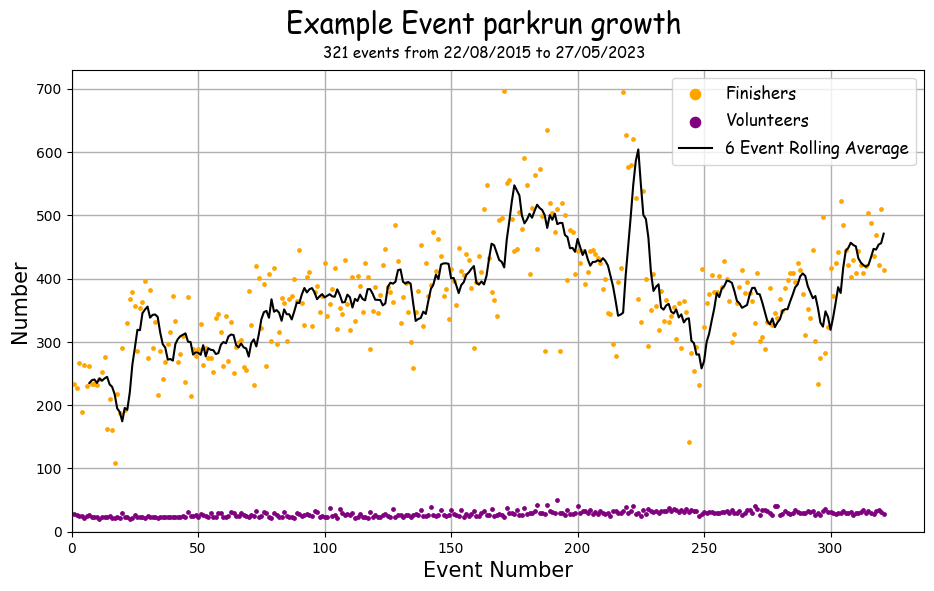

In [7]:
#---- Plot of finisher numbers and volunteer numbers per event----

#figure and scatter subplot layout
rows, cols = 1, 1 #only 1 plot required in this case
fig, ax = plt.subplots(rows,cols, figsize=(11,6))
plt.rcParams.update({'font.family': 'Comic Sans MS'})
 
#plot scatter data
x=df['EVENT']
y1=df['FINISHERS']
y2=df['VOLUNTEERS']
y3=df['FINISHERS_AVGroll']

ax.scatter(x,y1, s=6, color='orange', label = 'Finishers') #creates scatterplot data
ax.scatter(x,y2, s=6, color='purple', label = 'Volunteers') #creates scatterplot data
ax.plot(x,y3, color='black', label = f'{roll} Event Rolling Average') #creates scatterplot data

#---------- Plot Customisations-----------
#Title
fig.suptitle(f'{ev_name} parkrun growth', fontsize=20)
#create subtitle
fig.text(0.5, 0.9, f"{events} events from {inaugural} to {latest}", horizontalalignment="center", fontsize = 11)

#axis labels
ax.set_xlabel ('Event Number',fontsize = 15)
ax.set_ylabel ('Number',fontsize = 15)

#set (0,0) as lower limits of x and y axes
ax.set_xlim(0)
ax.set_ylim(0)

# apply legend to label dataset 
plt.legend(fontsize = 12, markerscale=3)

#select to show grid with major gridlines thicker than minor
ax.grid(visible=True, which = 'major', linewidth=1)
ax.grid(visible=True, which = 'minor',linewidth=0.5)
ax.set_axisbelow(True) #ensures data points appear infront of gridlines
